<a href="https://colab.research.google.com/github/jenny102292/data-science-bootcamp/blob/main/05_prawdopodobienstwo_statystyka/01_prawdopodobienstwo_statystyka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rachunek prawdopodobienstwa i statystyka

### Spis treści:
1. [Wprowadzenie](#a1)
2. [Statystyka opisowa - miary tendencji centralnej](#a2)
3. [Statystyka opisowa - miary rozrzutu](#a3)
4. [Dystrybuanta empiryczna](#a4)
5. [Przestrzeń probabilistyczna](#a5)
6. [Przestrzeń klasyczna](#a6)
7. [Niezależność zdarzeń](#a7)
8. [Prawdopodobieństwo warunkowe](#a8)
9. [Zmienna losowa](#a9)

### <a name='a1'></a> Wprowadzenie

Rozważmy populację składającą się dokładnie z $n$ elementów. Oznaczmy przez $X$ badaną cechę populacji oraz przez $x_1, \dots, x_n$ wartości cechy $X$. Cechę $X$ nazywać będziemy zmienną losową.

---
**Przykład - dane dyskretne**

Populacja - grupa studentów (5 osób)

Badana cecha $X$ - ocena z egzaminu

Realizacja zmiennej: 3, 4.5, 5, 4.5, 3

In [1]:
import numpy as np

X = np.array([3, 4.5, 5, 4.,5, 3])
print(X)

[3.  4.5 5.  4.  5.  3. ]


**Przykład - dane ciągłe**

Populacja - grupa studentów (5 osób)

Badana cecha $X$ - wzrost studenta

Reazlizacja zmiennej: 185.0, 179.5, 168.0, 192.0, 185.5

In [2]:
X = np.array([185.0, 179.5, 168.0, 192.0, 185.5])
print(X)

[185.  179.5 168.  192.  185.5]


### <a name='a2'></a> Statystyka opisowa - miary tendecji centralnej

**DEFINICJA 1.**
Średnią arytmetyczną ciągu wartości $x_1, \dots, x_n$ nazywamy:
$$\bar{x}= \frac{x_{1} + x_{2} + \ \ldots \ + x_{n}}{n} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$$

**PRZYKŁAD 2.**
Rozważmy ciąg: $3, 4.5, 5, 4.5, 3$
$$\bar{x}=\frac{3 +4.5 + 5 + 4.5 + 3}{5} = 4.0$$

In [3]:
X = np.array([3, 4.5, 5, 4.5, 3])
X.mean()

4.0

**DEFINICJA 3.**
Medianą ciągu wartości $x_1, \dots, x_n$ nazywamy środkowy wyraz tego ciągu, gdy $n$ jest liczbą nieparzystą, w przeciwnym przypadku średnią arytmetyczną dwóch wyrazów środkowych.

$Mediana = Me = \left\{\begin{array} {lll} x_{(k+1)} &  \hbox{ dla } & n=2k+1 \\[1mm] \frac{x_{(k)}+x_{(k+1)}}{2} & \hbox{ dla } & n=2k. \end{array} \right.$,
gdzie $x_{(1)} \le x_{(2)} \le  \dots \le x_{(n)}.$  

**PRZYKŁAD 4.**
Rozważmy ciąg: $3, 4.5, 5, 4.5, 3$
Porządkujemy ciąg: $3, 3, 4.5, 4.5, 5$
Ponieważ liczba elementów (=5) jest liczbą nieparzystą wybieramy środkowy wyraz tego ciągu czyli:
$$Mediana = 4.5$$

In [4]:
np.median(X)

4.5

**PRZYKŁAD 5.** Rozważmy ciąg: $5, 4.5, 3, 5$

Porządkujemy ciąg: $3, 4.5, 5, 5$
Ponieważ liczba elementów (=4) jest liczbą parzystą obliczamy średnią arytmetyczną wyrazów środkowych:
$$Mediana = \frac{4.5 + 5}{2} = 4.75$$

**DEFINICJA 6.**
Moda (wartość modalna) to najczęściej występująca wartość w ciągu.

**PRZYKŁAD 7.**
Rozważmy ciąg: $3, 4.5, 5, 4.5, 2$
$$Moda = 4.5$$

### <a name='a3'></a> Statystyka opisowa - miary rozrzutu

**DEFINICJA 8.**
**Średni błąd** ciągu wartości $x_1, \dots, x_n$ nazywamy wartości:
$$b=\frac{1}{n} \sum_{i=1}6{n} | x_{i}-\bar{x} | $$

Im mniejszy jest średni błąd tym zmienna $X$ ma mniejszy rozrzut.

**PRZYKŁAD 9.**
Rozważmy zmienną losową $X$ o realizacji $3.5, 4.0, 4.0$ oraz zmienną losową $Y$ o realizacji $2.0, 4.0, 5.0$.

Policzmy średni błąd.
$\bar{X} = \frac{3.5 + 4.0 + 4.0}{3} = 3.83$
$\bar{Y} = \frac{2.0 + 4.0 + 5.0}{3} = 3.67$

Zatem
$b_X = \frac{1}{3}(|3.5 - 3.8| + |4.0 - 3.83| + |4.0 - 3.83|) = $

In [5]:
X = [3.5, 4.0, 4.0]
Y = [2.0, 4.0, 5.0]

X_mean = np.mean(X)
Y_mean = np.mean(Y)

print(f'X_mean: {X_mean:.4f}')
print(f'Y_mean: {Y_mean:.4f}')

X_mean: 3.8333
Y_mean: 3.6667


In [6]:
b_X = 1 / len(X) * (abs(X - X_mean).sum())
b_Y = 1 / len(Y) * (abs(Y - Y_mean).sum())

print(f'Średni błąd X: {b_X:.4f}')
print(f'Średni błąd Y: {b_Y:.4f}')

Średni błąd X: 0.2222
Średni błąd Y: 1.1111


**DEFINICJA 10.**
Wariancją ciągu $x_1, \dots, x_n$ nazywamy wartość:

$$s_{n}^{2} = \frac{1}{n} \sum_{i=1}^{n} (x_{i}-\bar{x})^{2}$$

**DEFINICJA 11.**
Odchyleniem standardowym ciągu $x_1, \dots, x_n$ nazywamy wartość:

$$s_n = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{i} - \bar{x})^{2}}.$$

In [8]:
var_X = 1 / len(X) * ((X - X_mean)**2).sum()
var_Y = 1 / len(Y) * ((Y - Y_mean)**2).sum()

print(f'Wariancja zmiennej X: {var_X:.4f}')
print(f'Wariancja zmiennej Y: {var_Y:.4f}\n')

std_X = np.sqrt(var_X)
std_Y = np.sqrt(var_Y)

print(f'Odchylenie standardowe zmiennej X: {std_X:.4f}')
print(f'Odchylenie standardowe zmiennej Y: {std_Y:.4f}')

Wariancja zmiennej X: 0.0556
Wariancja zmiennej Y: 1.5556

Odchylenie standardowe zmiennej X: 0.2357
Odchylenie standardowe zmiennej Y: 1.2472


In [9]:
print(np.std(X))
print(np.std(Y))

0.23570226039551584
1.247219128924647


### <a name='a4'></a> Dystrybuanta empiryczna

**DEFINICJA 12.**
Kwantylem rzędu $p$ zmiennej losowej $X$ nazywamy wartość, która dzieli uporządkowany ciąg wartości $x_1, \dots, x_n$ na dwie części w proporcjach $p$ oraz $1-p$.

**PRZYKŁAD 13.**
Mediana jest kwantylem rzędu $p=\frac{1}{2}$.

**DEFINICJA 14.**
Dystrybuantą empiryczną ciągu  $x_1, \dots, x_n$ nazywamy funkcję określoną wzorem:
$$F(x)=\frac{ \# \{x_{i}: \ x_{i} \leq x \} }{n} \;\; \textrm{dla}\;\; x\in {\Bbb R}$$

Przy pomocy dystrybuanty możemy w prosty sposób określić wzór na kwantyl rzędu $p$:

$$q_p = \min \{ x : F(x) \ge p \}$$

### <a name='a5'></a> Przestrzeń probabilistyczna

**DEFINICJA 15.**
Przestrzenią probabilistyczną nazywamy trójkę $(\Omega, \mathscr{F}, P)$, gdzie $\Omega$ jest zbiorem niepustym (przestrzeń zdarzeń), $\mathscr{F}$ jest rodziną podzbiorów zbioru $\Omega$ (sigma ciało) oraz $P$ jest miarą probabilistyczną (prawdopodobieństwo):
$$P:\mathscr{F} \rightarrow R$$

Elementy zbioru $\Omega$ nazywamy zdarzeniami elementarnymi, elementy $\mathscr{F}$ zdarzeniami. Zbiór pusty reprezentuje zdarzenie niemożliwe, zaś zbiór $\Omega$ zdarzenie pewne. Zdarzenie $\Omega \backslash A$ nazywamy zdarzeniem przeciwnym do zdarzenia $A$ i wreszcie liczbę $P(A)$ nazywamy prawdopodobieństwem zdarzenia A.

### <a name='a6'></a> Przestrzeń klasyczna

Niech $\Omega$ będzie zbiorem skończonym składającym się z $n$ jednakowo prawdopodobnych zdarzeń elementarnych:
$$\Omega = \{\omega_1, \dots, \omega_n\}$$
oraz niech $\mathscr{F}$ rodzina podzbiorów zbioru $\Omega$. Jeśli $A \in \mathscr{F}$, to:
$$P(A) = \frac{\#A}{n}$$

**PRZYKŁAD 16.**
Niech $\Omega = \{1, 2, 3, 4, 5, 6\}$, $A$ oznacza zdarzenie polegające na wyrzuceniu liczby parzystej, mamy zatem   
$n=6$  
$A=\{2, 4, 6\}$   
oraz $\#A = 3$  
Stąd $P(A) = \frac{\#A}{n} = \frac{3}{6} = \frac{1}{2}$

In [10]:
omega = {1, 2, 3, 4, 5, 6}
A = {item for item in omega if item % 2 ==0}

P_A = len(A) / len(omega)
print(f'Zbiór A: {A}')
print(f'Prawdopodobieństwo zdarzenia A: {P_A}')

Zbiór A: {2, 4, 6}
Prawdopodobieństwo zdarzenia A: 0.5


**PRZYKŁAD 17.**
Niech $\Omega = \{1, 2, 3, 4, 5, 6\}$, $B$ oznacza zdarzenie polegające na wyrzuceniu liczby większej niż 4, mamy zatem

$n=6$

$B=\{5, 6\}$

oraz $\#B = 2$

Stąd $P(B) = \frac{\#A}{n} = \frac{2}{6} = \frac{1}{3}$

In [12]:
omega = {1, 2, 3, 4, 5, 6}
B = {item for item in omega if item > 4}

P_B = len(B) / len(omega)
print(f'Zbiór B: {B}')
print(f'Prawdopodobieństwo zdarzenia B: {P_B}')

Zbiór B: {5, 6}
Prawdopodobieństwo zdarzenia B: 0.3333333333333333


### <a name='a7'></a> Niezależność zdarzeń

**DEFINICJA 18.**
Dwa zdarzenia $A$ i $B$ są niezależne, gdy:
$$P(A\cap B) = P(A)\cdot P(B)$$

**PRZYKŁAD 17.**
Rozważmy dwa zdarzenia $A$ i $B$ z poprzednich przykładów.

In [14]:
intersection_AB = set.intersection(A, B)
P_intersection_AB = len(intersection_AB) / len(omega)

PA_PB = P_A * P_B

print(f'Przecięcie zbiorów A i B: {intersection_AB}\n')
print(f'Iloczyn prawdopodobieństwa zdarzeń A i B: {PA_PB:.4f}')
print(f'Prawdopodobieństwo iloczynu zdarzeń A i B: {P_intersection_AB:.4f}\n')

check = 'Zdarzenia niezależne' if PA_PB == P_intersection_AB else 'Zdarzenia zależne'
print(check)

Przecięcie zbiorów A i B: {6}

Iloczyn prawdopodobieństwa zdarzeń A i B: 0.1667
Prawdopodobieństwo iloczynu zdarzeń A i B: 0.1667

Zdarzenia niezależne


Rozważmy zdarzenie $C$ - wyrzucenie liczby oczek większą niż 1

In [17]:
C = {item for item in omega if item > 1}

P_C = len(C) / len(omega)
print(f'Zbiór C: {C}')
print(f'Prawdopodobieństwo zdarzenia C: {P_C:.4f}')

intersection_AC = set.intersection(A, C)
P_intersection_AC = len(intersection_AC) / len(omega)

PA_PC = P_A * P_C

print(f'Przecięcie zbiorów A i C: {intersection_AC}\n')
print(f'Iloczyn prawdopodobieństw zdarzeń A i C: {PA_PC:.4f}')
print(f'Prawdopodobieństwo iloczynu zdarzeń  A i C: {P_intersection_AC:.4f}\n')

check = 'Zdarzenia niezależne' if PA_PC == P_intersection_AC else 'Zdarzenia zależne'
print(check)

Zbiór C: {2, 3, 4, 5, 6}
Prawdopodobieństwo zdarzenia C: 0.8333
Przecięcie zbiorów A i C: {2, 4, 6}

Iloczyn prawdopodobieństw zdarzeń A i C: 0.4167
Prawdopodobieństwo iloczynu zdarzeń  A i C: 0.5000

Zdarzenia zależne


### <a name='a8'></a> Prawdopodobieństwo warunkowe
Przawdopodobieństwem warunkowym zdarzenia $A$ pod warunkiem zajścia zdarzenia $B$ przy zał. $P(B) > 0$ nazywamy:
$$P(A|B) = \frac{P(A\cap B)}{P(B)}.$$

In [18]:
print(f'A: {A}')
print(f'B: {B}')
print(f'Przecięcie A i B: {intersection_AB}')

A: {2, 4, 6}
B: {5, 6}
Przecięcie A i B: {6}


In [19]:
PA_cond_B = P_intersection_AB / P_B
print(f'Prawdopodobieństwo wylosowania liczby parzystej pod warunkiem, że wylosowaliśmy liczbę większą niż 4 wynosi: {PA_cond_B}')

Prawdopodobieństwo wylosowania liczby parzystej pod warunkiem, że wylosowaliśmy liczbę większą niż 4 wynosi: 0.5


### <a name='a9'></a> Zmienna losowa

### <a name='a10'></a> Dystrybuanta

Niech $X$ będzie zmienną losową z przestrzeni $R^n$. Niech $F(x)$ oznacza dystrybuantę zmiennej losowej $X$, tzn.
$$F(x) = P(X \leq x)$$  
Jeśli dystrybuanta jest funkcją ciągłą to funkcja określona wzorem
$$f(x) = \frac{dF(x)}{dx} = F'(x)$$  
jest nazywana **gęstością rozkładu** zmiennej losowej $X$.  
Stąd mamy $$P(a < X \leq b) = \int_a^bf(x)\ dx$$

### Wartość oczekiwana
Wartością oczekiwaną zmiennej losowej ciągłej nazywamy wartość:
$$E(X) = \int_{-\infty}^{\infty}x \cdot f(x)\ dx$$

Wartością oczekiwaną zmiennej losowej dyskretnej nazywamy wartość:
$$E(X) = \sum_{i=1}^{n}x_i \cdot P(X=x_i)$$

Dla klasycznej przestrzeni probabilistycznej, gdzie każde zdarzenie ma jednakowe prawdopodobieństwo zajścia otrzymujemy klasyczny wzór:
$$E(X) = \frac{1}{n}\sum_{i=1}^{n}x_{i}$$

### Wariancja
Wariancją zmiennej losowej nazywamy wartość:
$$Var(X) = E(X-E(X))^2 = E(X^2) - (E(X))^2$$

Stąd wariancja zmiennej losowej ciągłęj ma postać:
$$Var(X) = D^2(X) = \int_{-\infty}^{\infty}(x - E(X))^2 \cdot f(x)\ dx$$

### Odchylenie standardowe
Odchyleniem standardowym nazywamy pierwiastek z wariancji, tj.
$$\sigma(X) = \sqrt{D^2(X)}$$

### Kowariancja
$X, Y$ - zmienne losowe

$$Cov(X, Y) = E(X-E(X))(Y-E(Y)) = E(XY) - E(X)E(Y)$$

### Korelacja
$$Cor(X, Y) = \frac{Cov(X, Y)}{\sigma(X)\cdot\sigma(Y)}$$

### Błąd standardowy
$$SE(X) = \frac{\sigma(X)}{\sqrt(n)}$$

### Przykład 1

| $X$        | 0   | 1   | 2    | 3    |
|----------|-----|-----|------|------|
| $P(X=x_i)$ | 0.5 | 0.3 | 0.15 | 0.05 |

$E(X) = 0 \cdot 0.5 + 1 \cdot 0.3 + 2 \cdot 0.15 + 3 \cdot 0.05$

In [20]:
EX = 0 * 0.5 + 1 * 0.3 + 2 * 0.15 + 3 * 0.05
EX

0.75

In [21]:
VAR_X = (0 - EX)**2 * 0.5 + (1 - EX)**2 * 0.3 + (2 - EX)**2 * 0.15 + (3 - EX)**2 * 0.05
VAR_X

0.7875000000000001

In [22]:
import numpy as np

STD_X = np.sqrt(VAR_X)
STD_X

0.8874119674649424

Przykład

In [23]:
x = np.random.randn(5)
y = np.random.randn(5)

print(x, '\n')
print(y)

[-2.48235889 -1.27697303  2.15222513 -0.65519661  1.55972544] 

[-0.49078602 -0.18527578 -0.69815153  1.7557146  -0.75018739]


In [24]:
x.mean()

-0.14051559176899184

In [25]:
x.std()

1.7428793232571183

In [26]:
np.corrcoef(x, y)

array([[ 1.        , -0.29666969],
       [-0.29666969,  1.        ]])

### Rozkład normalny

Rozkład normalny $X \sim N(\mu, \sigma)$

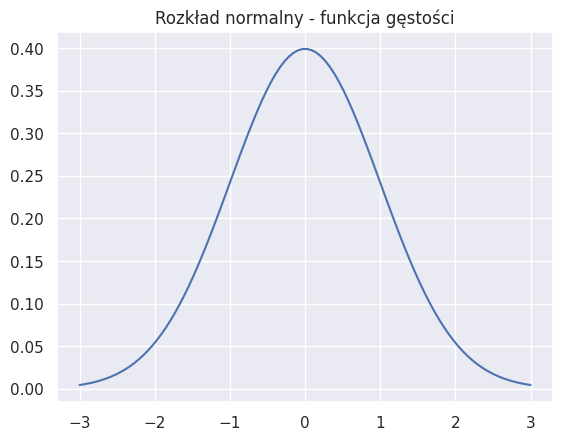

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()

mi = 0 # średnia
sigma = 1 # odchylenie standardowe
x = np.linspace(mi - 3 * sigma, mi + 3 * sigma, 100)
plt.title('Rozkład normalny - funkcja gęstości')
_ = plt.plot(x, norm.pdf(x, mi, sigma))

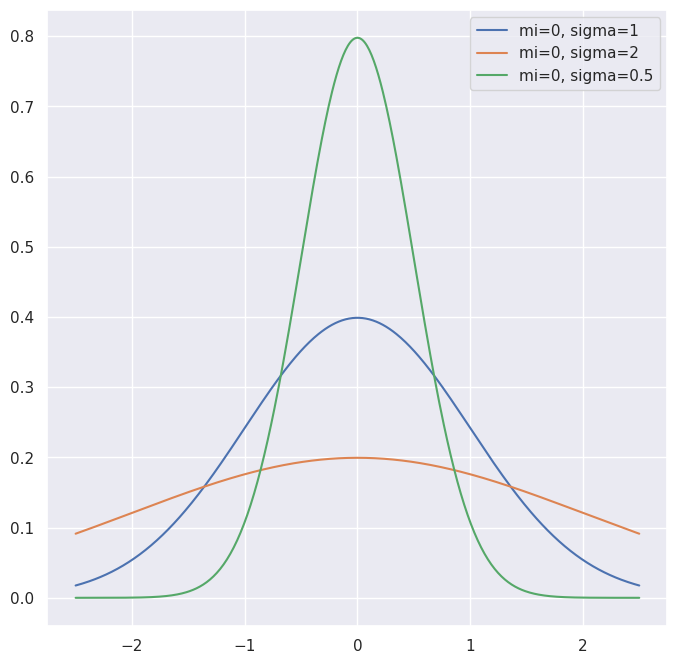

In [35]:
x = np.linspace(mi - 5 * sigma, mi + 5 * sigma, 500)
parms = [(0, 1), (0, 2), (0, 0.5)]

plt.figure(figsize=(8, 8))
for mi, sigma in parms:
  plt.plot(x, norm.pdf(x, mi, sigma), label=f'mi={mi}, sigma={sigma}')
plt.legend()

### Standaryzacja
Niech $X \sim N(\mu, \sigma)$. Wówczas
$$\frac{X - \mu}{\sigma} \sim N(0, 1)$$

$$E\left(\frac{X - \mu}{\sigma}\right) = \frac{E(X - \mu)}{\sigma} = \frac{E(X) - \mu}{\sigma} = \frac{\mu - \mu}{\sigma} = 0$$

$$D^2\left(\frac{X - \mu}{\sigma}\right) = \frac{1}{\sigma^2}\cdot D^2\left(X - \mu\right) = \frac{1}{\sigma^2} \cdot D^2(X) = \frac{1}{\sigma^2}\cdot \sigma^2 = 1$$

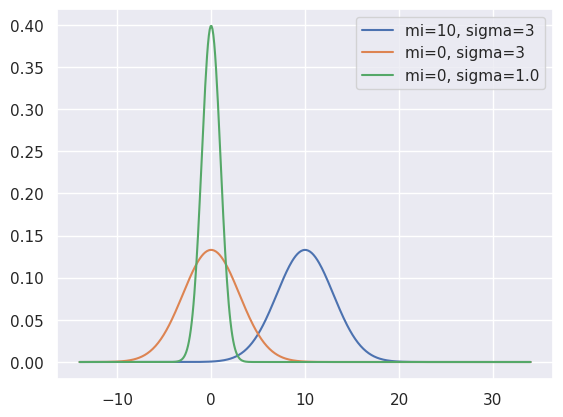

In [37]:
mi = 10
sigma = 3
x = np.linspace(mi - 8 * sigma, mi + 8 * sigma, 500)

plt.plot(x, norm.pdf(x, mi, sigma), label=f'mi={mi}, sigma={sigma}')
plt.plot(x, norm.pdf(x, mi - mi, sigma), label=f'mi={mi - mi}, sigma={sigma}')
plt.plot(x, norm.pdf(x, mi - mi, sigma / sigma), label=f'mi={mi - mi}, sigma={sigma / sigma}')
plt.legend()

### Wykres dystrybuanty

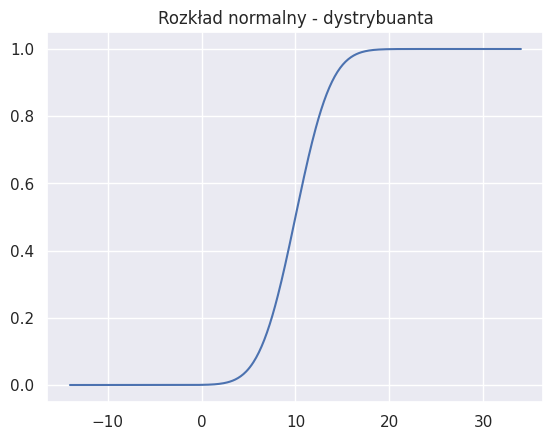

In [38]:
plt.title('Rozkład normalny - dystrybuanta')
_ = plt.plot(x, norm.cdf(x, mi, sigma))

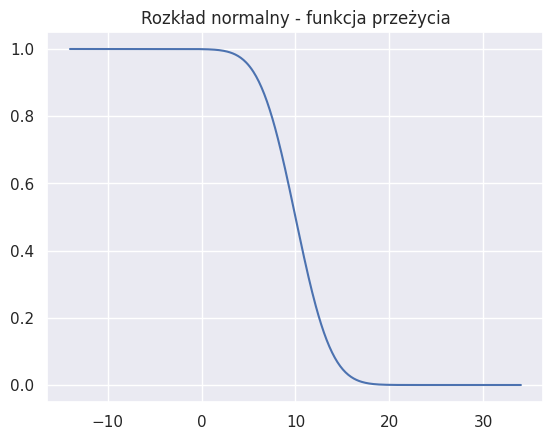

In [39]:
plt.title('Rozkład normalny - funkcja przeżycia')
_ = plt.plot(x, norm.sf(x, mi, sigma))

In [40]:
from scipy import stats

dir(stats)

['BootstrapMethod',
 'CensoredData',
 'ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'MonteCarloMethod',
 'NearConstantInputWarning',
 'PermutationMethod',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_ansari_swilk_statistics',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_bws_test',
 '_censored_data',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multicomp',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_qmvnt',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sampling',
 '_sensitivity_analysis',
 '_sobol',
 '_stats',